# Критерий согласия Пирсона ( $\chi^2$)

In [18]:
import numpy as np
import pandas as pd

from scipy import stats

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Исчерпанная рождаемость

Исчерпанная рождаемость — количество детей, родившихся у женщины на момент окончания конвенционального репродуктивного возраста (45 лет). Для 1878 женщин старше 45, участвовавших в социологическом опросе жителей Швейцарии, известно количество детей. Этот признак — типичный счётчик, а, значит, его можно попробовать описать распределением Пуассона.

* **выборка** - целочисленный вектор длиы $n$, характеризующий количество детей у опрашиваемой женщины
* **гипотеза $H_0$** - рассматриваемая величина имеет распределение Пуассона

In [49]:
fin = open('fertility.txt', 'r')
data = list(map(lambda x: int(x.strip()), fin.readlines()))

In [56]:
data = []
for i in range(0, 67, 1):
    data.append(1)
for i in range(67, 100, 1):
    data.append(0)

In [45]:
#data

D:\Program_Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


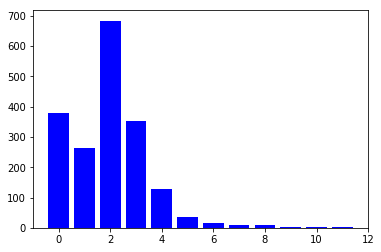

In [51]:
pylab.bar(range(12), np.bincount(data), color = 'b')
pylab.legend()

In [57]:
l = np.mean(data)
l

0.67000000000000004

## Критерий согласия

In [58]:
observed_frequences = np.bincount(data)
observed_frequences

array([33, 67], dtype=int64)

In [59]:
expected_frequences = [len(data)*stats.poisson.pmf(x, l) for x in range(min(data), max(data) + 1)]
expected_frequences

[51.170857778654245, 34.284474711698344]

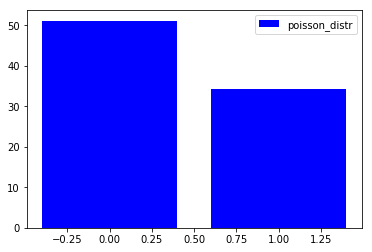

In [60]:
pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы имеет распределение хи-квадрат с числом степеней свободы $K-1-m$, где $m$ - число параметров распределения, оцененных по выборке.

In [61]:
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=37.670877394685924, pvalue=nan)